### Food Recognition Model Training


In [2]:
# check_dataset.py

import os

# path of formatted_annotations
f_path = os.path.join(os.getcwd(), 'formatted_annotations')

# path of images
img_path = os.path.join(os.getcwd(), os.pardir, 'images')

print(f_path)
print(img_path)



/home/weijian/Deep_Learning_ws/food_recognition_model/datasets/UNIMIB2016/UNIMIB2016-annotations/formatted_annotations
/home/weijian/Deep_Learning_ws/food_recognition_model/datasets/UNIMIB2016/UNIMIB2016-annotations/../images


In [3]:
def check_dataset():
    annotations = [i[:-4] for i in os.listdir(f_path)]
    imgs = [i[:-4] for i in os.listdir(img_path)]

    for annotation in annotations:
        label = annotation + '.txt'
        label_path = os.path.join(f_path, label)

        try:
            if annotation not in imgs:
                # remove annotation which is not in images
                print('not found image: {}, remove its annotation'.format(annotation))
                print(label_path)
                raise FileExistsError

            else:
                # check extra spaces in a line
                with open(label_path) as f:
                    lines = f.readlines()
                    for line in lines:
                        item = line.split()
                        if len(item) > 9:
                            print('wrong label format: {}, {}'.format(annotation, line))
                            raise FileExistsError

        except FileExistsError:
            os.remove(label_path)
            print('os.remove({})'.format(label_path))

In [4]:
if __name__ == '__main__':
    check_dataset()

In [9]:
# 统计formatted_annotations中的标签数量
# Path: UNIMIB2016/UNIMIB2016-annotations/Untitled-1.ipynb
# count_labels.py

import os

# path of formatted_annotations
f_path = os.path.join(os.getcwd(), 'formatted_annotations')

print(f_path)

def count_labels():
    annotations = [i[:-4] for i in os.listdir(f_path)]
    labels = {}

    for annotation in annotations:
        label = annotation + '.txt'
        label_path = os.path.join(f_path, label)

        with open(label_path) as f:
            lines = f.readlines()
            for line in lines:
                item = line.split()
                if item[0] not in labels.keys():
                    labels[item[0]] = 1
                else:
                    labels[item[0]] += 1



if __name__ == '__main__':
    count_labels()





/home/weijian/Deep_Learning_ws/food_recognition_model/datasets/UNIMIB2016/UNIMIB2016-annotations/formatted_annotations


#### class_count.py

In [1]:
# UNIMIB2016
# ├── UNIMIB2016-annotations
# │   ├── check_dataset.py
# │   ├── class_count.py <--
# │   └── formatted_annotations
# └── images

# class_count.py

import os
import pandas as pd

# formatted_annotations path
path = os.path.join(os.getcwd(), 'formatted_annotations')

# output path
output = os.path.join(os.getcwd(), 'class_counts_result.csv')

# read file list of formatted_annotations
annotations = os.listdir(path)

if __name__ == '__main__':
    labels = []
    for annotation in annotations:
        with open(os.path.join(path, annotation)) as file:
            for line in file:
                item = line.split()
                cls = item[0]
                labels.append(cls)
    counts = pd.Series(labels).value_counts()
    counts.to_csv(output, header=False)

    


#### toYolo.py

In [6]:
# UNIMIB2016
# ├── UNIMIB2016-annotations
# │   ├── check_dataset.py
# │   ├── class_count.py
# │   ├── toYolo.py <--
# │   ├── class_counts_result.csv
# │   └── formatted_annotations (1005)
# ├── labels
# └── images (1005)

# toYolo.py

import os
from PIL import Image

# formatted_annotations path
path = os.path.join(os.getcwd(), 'formatted_annotations')

# path of images
img_path = os.path.join(os.getcwd(), os.pardir, 'images')

# output path
output_path = os.path.join(os.getcwd(), os.pardir, 'labels')

# class count file path
class_file_path = os.path.join(os.getcwd(), 'class_counts_result.csv')


def convert_box(size, box):
    # convert VOC to yolo format
    dw, dh = 1. / size[0], 1. / size[1]
    x, y, w, h = (box[0] + box[1]) / 2.0, (box[2] + box[3]) / 2.0, box[1] - box[0], box[3] - box[2]
    return [x * dw, y * dh, w * dw, h * dh]


def convert_bbox(ibb):
    # convert ibb to VOC format
    # ibb = [x1,y1,x2,y2,x3,y3,x4,y4]
    X = ibb[0::2]
    Y = ibb[1::2]
    xmin = min(X)
    ymin = min(Y)
    xmax = max(X)
    ymax = max(Y)
    return xmin, ymin, xmax, ymax


def get_classes():
    # output: class list
    cf = open(class_file_path, 'r')
    clss = [line.split(',')[0] for line in cf.readlines()]
    cf.close()
    return clss


def toYolo():
    # read file list of formatted_annotations
    annotations = os.listdir(path)

    # get class list
    clss = get_classes()

    # convert every annotation in ./formatted_annotations/ to yolo format
    for annotation in annotations:

        with open(os.path.join(path, annotation)) as file, open(os.path.join(output_path, annotation), 'w') as opfile:

            # read img
            img_f_path = os.path.join(img_path, annotation[:-4] + '.jpg')
            img = Image.open(img_f_path)

            # get img size
            size = img.size

            # process every item in ./formatted_annotations/*.txt
            for line in file:
                item = line.split(' ')

                # get class num
                cls = item[0]
                cls_num = clss.index(cls)

                # get bbox coordinates
                item_bounding_box = list(map(float, item[1:]))
                xmin, ymin, xmax, ymax = convert_bbox(item_bounding_box)
                b = [xmin, xmax, ymin, ymax]
                bb = convert_box(size, b)

                # append item to output file: ../labels/*.txt
                item_str = list(map(str, [cls_num] + bb))
                line_yolo = ' '.join(item_str)
                opfile.write(line_yolo + '\n')

            print(annotation)


if __name__ == '__main__':
    toYolo()


20151221_123903.txt
20151204_132424.txt
20151221_125255.txt
20151211_122103.txt
20151211_140744.txt
20151127_115553.txt
20151127_131812.txt
20151221_120310.txt
20151211_141559.txt
20151211_141344.txt
20151203_124501.txt
20151127_130733.txt
20151127_133149.txt
20151204_132116.txt
20151204_121303.txt
20151130_121343.txt
20151127_121213.txt
20151211_132412.txt
20151221_125211.txt
20151127_132700.txt
20151211_131130.txt
20151211_120936.txt
20151127_130620.txt
20151211_124745.txt
20151204_123241.txt
20151211_125829.txt
20151127_115151.txt
20151221_131526.txt
20151130_114619.txt
20151204_132641.txt
20151211_141315.txt
20151211_115756.txt
20151221_125957.txt
20151127_120128.txt
20151221_122133.txt
20151130_113729.txt
20151211_135719.txt
20151221_131230.txt
20151221_133902.txt
20151211_130428.txt
20151211_132304.txt
20151211_140657.txt
20151127_141411.txt
20151211_124757.txt
20151221_124819.txt
20151127_141102.txt
20151211_123958.txt
20151127_132413.txt
20151130_122530.txt
20151211_135815.txt


#### rectify_imgs.py

In [14]:
# UNIMIB2016
# ├── UNIMIB2016-annotations
# │   ├── check_dataset.py
# │   ├── class_count.py
# │   ├── toYolo.py
# │   ├── class_counts_result.csv
# │   └── formatted_annotations
# ├── rectify_imgs.py <--
# ├── labels (1005)
# └── images (1005)

# rectify_imgs.py

import os
from PIL import Image
import numpy as np

# image type
img_type = '.jpg'

# image folder path
path = os.path.join(os.getcwd(), os.pardir, 'images')


def rectify_imgs():
    for img_name in os.listdir(path):
        if not img_name[-4:] == img_type:
            continue
        img_path = os.path.join(path, img_name)
        img = Image.open(img_path)
        img_rectified = Image.fromarray(np.asarray(img))
        img_rectified.save(img_path)
        print(img_name)


if __name__ == '__main__':
    rectify_imgs()


20151211_140142.jpg
20151211_125024(0).jpg
20151127_125646.jpg
20151204_133742.jpg
20151127_131713.jpg
20151203_131110.jpg
20151211_131025.jpg
20151130_122317.jpg
20151130_121124.jpg
20151211_121939.jpg
20151221_113328.jpg
20151211_134835.jpg
20151204_131702.jpg
20151204_133446.jpg
20151211_142929.jpg
20151127_130511.jpg
20151203_124923.jpg
20151203_131745.jpg
20151127_130819.jpg
20151221_130104.jpg
20151204_115301.jpg
20151211_131911.jpg
20151127_131420.jpg
20151127_135305.jpg
20151221_123510.jpg
20151211_131726.jpg
20151221_120310.jpg
20151203_123432.jpg
20151127_141457.jpg
20151221_124614.jpg
20151130_121600.jpg
20151211_121210.jpg
20151211_125042.jpg
20151127_125457.jpg
20151204_123552.jpg
20151221_122329.jpg
20151211_134345.jpg
20151204_121844.jpg
20151221_122024.jpg
20151211_132746.jpg
20151211_141807.jpg
20151127_130448.jpg
20151203_131054.jpg
20151221_120520.jpg
20151204_120158.jpg
20151211_113705.jpg
20151204_123706.jpg
20151203_125225.jpg
20151204_135424.jpg
20151203_124659.j

#### test of reading and marking boundary box

In [3]:
from PIL import Image

img_name = '20151211_114703.jpg'
img = Image.open(os.path.join(img_path, img_name))
img.show()


In [4]:
from PIL import ImageDraw
from PIL import ImageFont

label_name = '20151211_114703.txt'
with open(os.path.join(f_path, label_name)) as file:
    items = file.readlines()
    
draw = ImageDraw.Draw(img)
for item in items:
  
    item = item.split()
    
    # convert str to int
    item[1:] = list(map(int, item[1:]))
    
    # draw bbox
    draw.rectangle([item[1], item[2], item[5], item[6]],
                       outline="red", width=20)
    
    # add text about order of the points
    for j, i in enumerate([1, 3, 5, 7]):
        j = j + 1
        draw.text([item[i], item[i + 1]], str(j))

img.show()


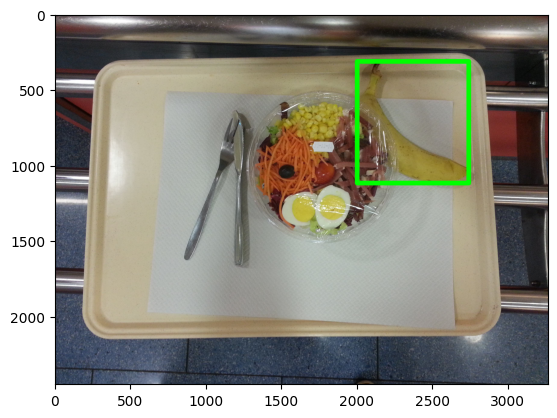

In [5]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread(os.path.join(img_path, img_name))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

for item in items:

    item = item.split()

    # convert str to int
    item[1:] = list(map(int, item[1:]))

    # draw bbox
    cv2.rectangle( img,
                  (item[1], item[2]),
                  (item[5], item[6]),
                  (0, 255, 0), 30)

plt.imshow(img)
plt.show()


#### splitDataset.py

In [1]:
# splitDataset.py

import os
import random
from random import shuffle

# labels relative path
# ./labels
ya_path = os.path.join(os.getcwd(), os.pardir, 'labels')

# images path (relative to 'dataset root dir' in UNIMIB2016.yaml)
# ./images/
img_path = os.path.join(os.getcwd(), os.pardir, 'images')

# output files name
output_train = 'train.txt'
output_test = 'test.txt'

# the percentage of train set
train_percent = .7


def splitDataset():
    all_samples = os.listdir(ya_path)
    num = len(all_samples)

    train_num = int(train_percent * num)

    # shuffle samples list
    random.seed(82322)
    shuffle(all_samples)

    train_set = all_samples[:train_num]
    test_set = all_samples[train_num:]

    # generate train set file
    with open(os.path.join(os.getcwd(), os.pardir, output_train), 'w') as f:
        for item in train_set:
            f.write(os.path.join(img_path, item[:-4] + '.jpg') + '\n')

    # generate test set file
    with open(os.path.join(os.getcwd(), os.pardir, output_test), 'w') as f:
        for item in test_set:
            f.write(os.path.join(img_path, item[:-4] + '.jpg') + '\n')

    print('train set num = ' + str(train_num))
    print('test set num = ' + str(num - train_num))


if __name__ == '__main__':
    splitDataset()

train set num = 703
test set num = 302


#### images中是.jpg，labels是.txt，train.txt指明训练集路径，test.txt指明测试集路径